# **Project Name**

**Classification - Yes Bank Stock Closing Price Prediction**

**Project Type** - **Exploratory Data Analysis**

**Contribution** - **Individual**

**Name** - **ARUNABH BHATTACHARYA**

# **Project Summary**

The Yes Bank Stock Closing Price Prediction project aims to forecast the bank's monthly closing stock prices using machine learning and time series models. Yes Bank, a prominent player in the Indian financial sector, has faced significant volatility since 2018 due to a high-profile fraud case involving Rana Kapoor. This project explores the impact of such events on stock prices and evaluates predictive models' effectiveness in capturing these fluctuations. The dataset consists of historical monthly stock prices, including opening, closing, highest, and lowest values. By leveraging advanced predictive techniques and Microsoft Azure, the project seeks to develop a reliable model for forecasting stock trends, providing valuable insights for investors and analysts.

Approach:

Utilize time series models and other predictive methods.

Analyze trends and patterns in historical stock data.



# **Github Link**

# **Problem Statement**

The stock prices of Yes Bank have experienced significant fluctuations, particularly since 2018 due to financial irregularities and governance issues. Accurately predicting the bank’s monthly closing stock prices is crucial for investors, analysts, and financial institutions to make informed decisions. This project aims to develop a predictive model using time series forecasting and machine learning techniques to analyze historical stock data and forecast future closing prices. The challenge lies in capturing market trends, external factors, and stock price volatility to improve prediction accuracy and provide actionable insights.

#### **Business Objective**

The primary objective of this project is to develop a predictive model that accurately forecasts Yes Bank’s monthly closing stock prices. This will help investors, financial analysts, and stakeholders make data-driven investment decisions by understanding stock price trends and potential risks. By leveraging historical stock data and advanced machine learning techniques, the project aims to enhance market predictions, mitigate investment risks, and improve financial planning strategies. Additionally, the insights gained from the model can be used to assess the impact of financial events, such as fraud cases or economic downturns, on stock price movements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install mplfinance
import mplfinance as mpf
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


In [2]:
data = pd.read_csv("data_YesBank_StockPrices.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
data.shape

(185, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
data.duplicated()
len(data[data.duplicated()])

0

In [7]:
data.isnull().sum().sum()

0

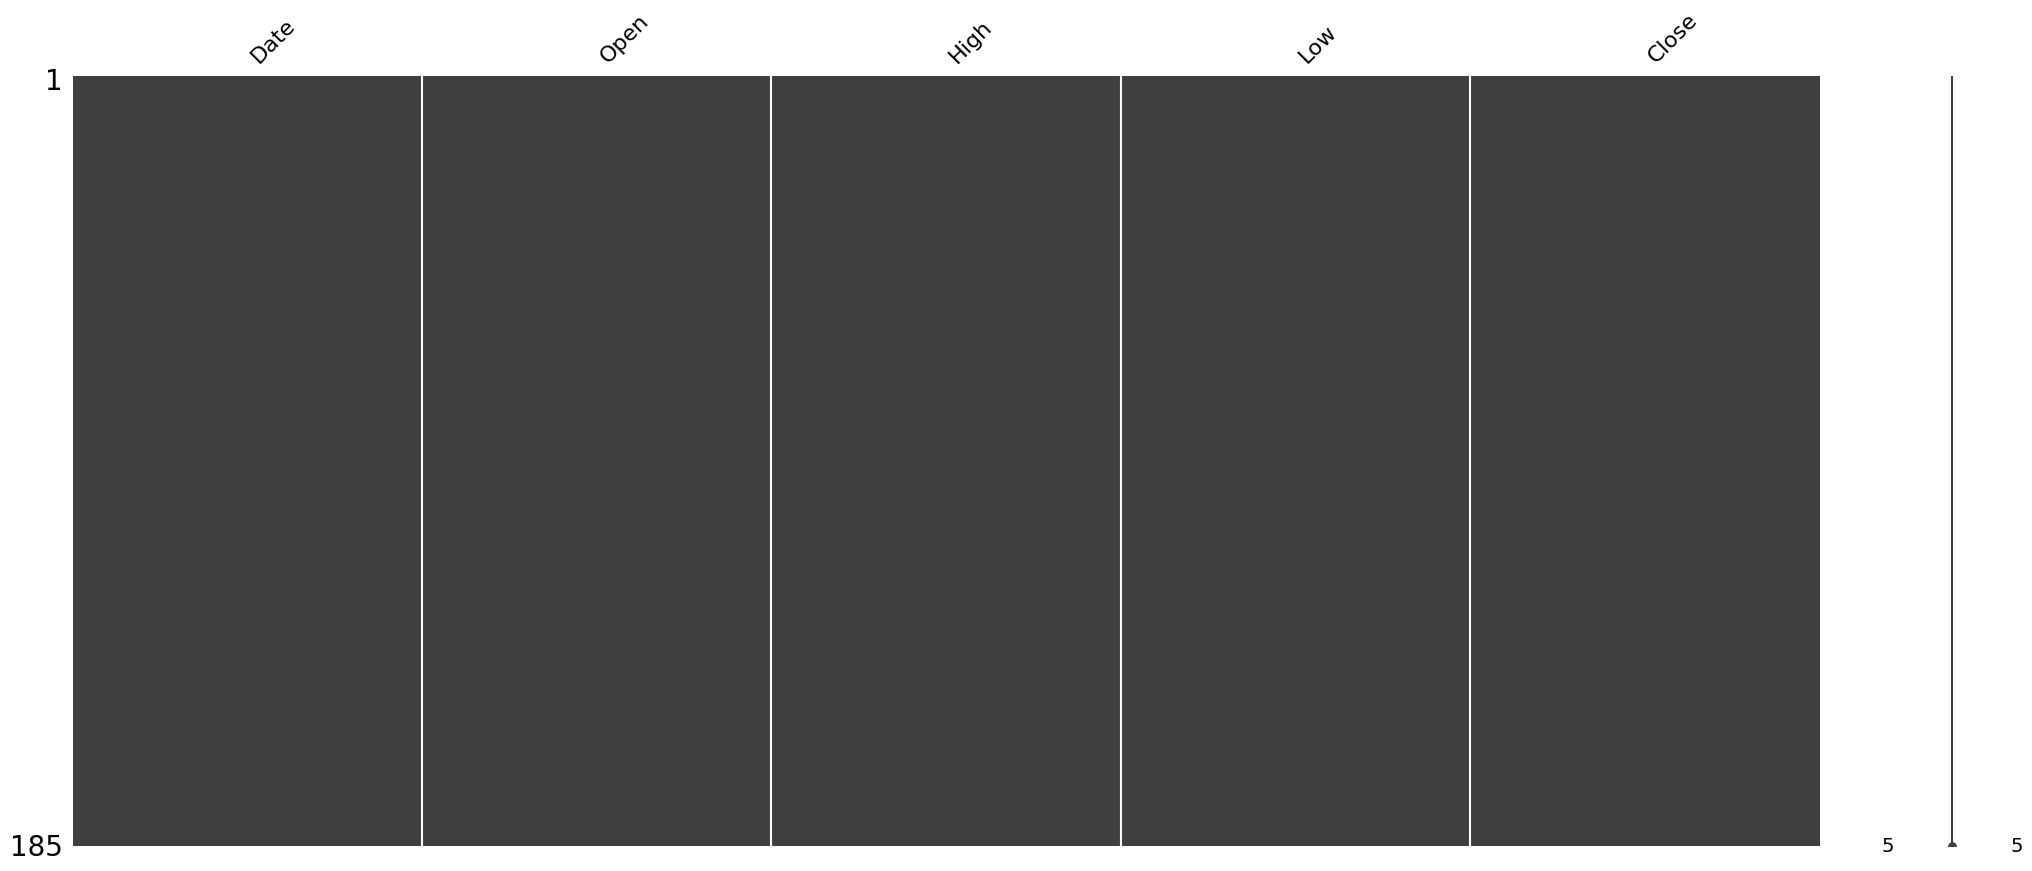

In [8]:
###visualizing missing values through a matrix
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(data)
plt.show()

In [9]:
#####There are 185 rows and 5 columns
#####there are no duplicates and no missing values

In [10]:
data.columns.values.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [11]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


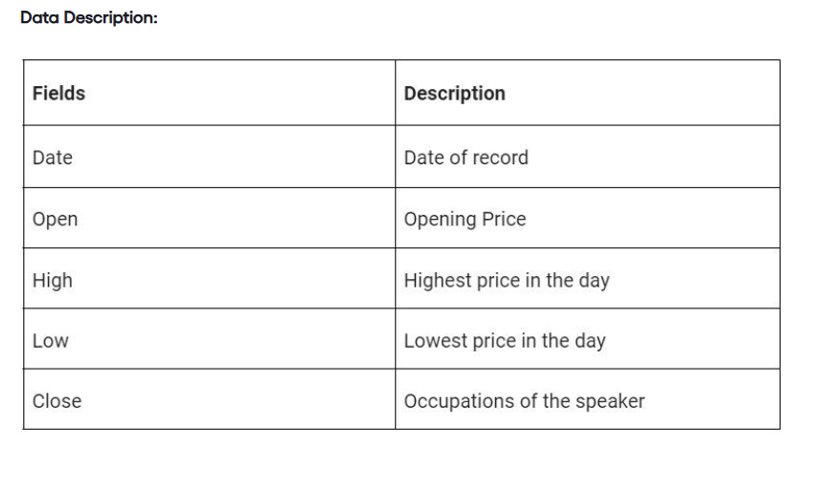

In [12]:
####variables description
from IPython.display import Image
Image('Screenshot 2025-03-04 132306.png')

In [13]:
####checking unique variables for each column
unique_values = data.nunique()
unique_values

,0
Date,185
Open,183
High,184
Low,183
Close,185


In [14]:
#####Data Wrangling
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

In [15]:
# Sort data by date
data = data.sort_values(by='Date')

In [16]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [17]:
data

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11
...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10


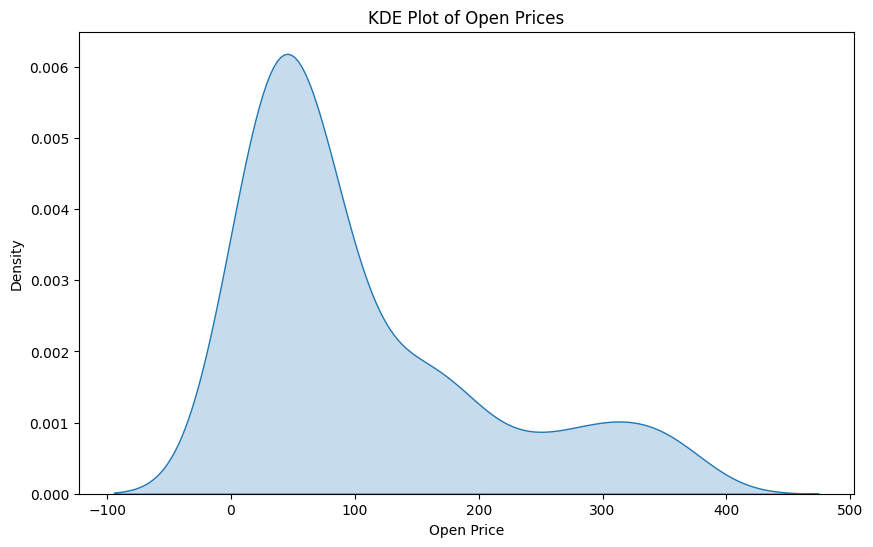

In [18]:
# KDE plot of 'Open'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Open'], shade=True)
plt.title('KDE Plot of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Density')
plt.show()

In [19]:
##### Why this chart
#This chart visualizes the distribution of the opening prices of Yes Bank stock using a Kernel Density Estimate (KDE) plot.
# The KDE plot provides a smoothed representation of the probability density function of the 'Open' column, showing the relative likelihood of different opening prices.
# This helps to understand the concentration of opening prices and identify any potential modes or skewness in the distribution.

In [20]:
#####Insights from the chart
#Distribution Shape: The KDE (Kernel Density Estimation) plot shows a right-skewed distribution, indicating that most opening stock prices are concentrated towards the lower range, with fewer instances of higher opening prices.
#Peak Density: The highest density is observed around a lower price range (approximately between ₹0 and ₹100), suggesting that for most of the recorded months, Yes Bank’s stock opened at a relatively low price.
#Long Tail: The plot has a long right tail, meaning there were occasional instances where the opening price was significantly higher (₹200+), but these were less frequent.
#Negative or Near-Zero Prices: The presence of values near or below zero may indicate either data anomalies, extreme market crashes, or incorrect data points that need further validation.

In [21]:
###business impact and outcome
#Stock Volatility Assessment: The long tail suggests periods of higher opening prices, potentially due to external factors such as market recovery, government interventions, or company performance improvements.
#Investor Sentiment Analysis: The concentration of lower opening prices indicates that Yes Bank has struggled with regaining investor confidence post-2018, aligning with its financial turmoil.
#Risk Management & Trading Strategy: Traders and investors can leverage this distribution insight to strategize investments, focusing on price trends and market recovery periods.
#Predictive Modeling Implications: The skewed nature of the data may require transformations (e.g., log transformation) to improve model performance when predicting stock prices.

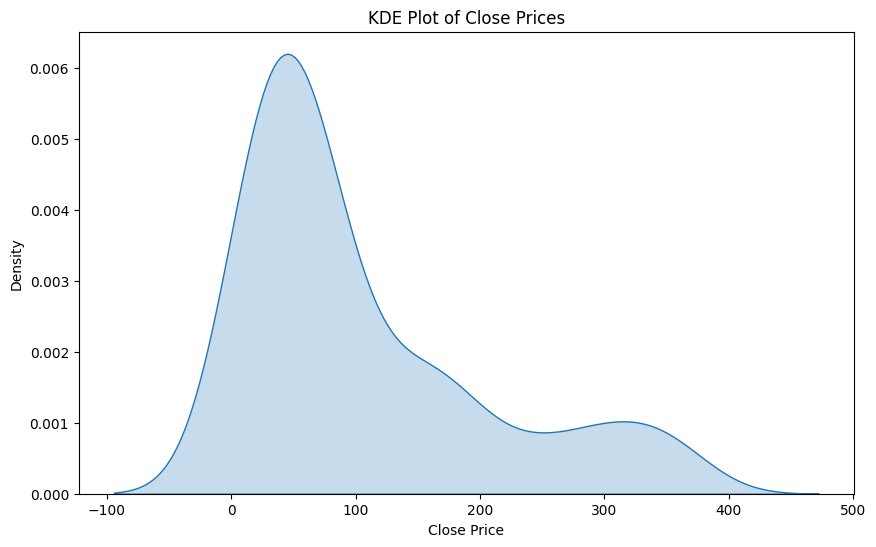

In [22]:
import matplotlib.pyplot as plt
# KDE plot of 'Close'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Close'], shade=True)
plt.title('KDE Plot of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()

In [23]:
###why this chart
##This KDE (Kernel Density Estimation) plot visualizes the distribution of
##closing prices of Yes Bank’s stock over time. It helps understand how
##frequently different closing prices occurred, identify patterns, and detect
##anomalies such as extreme highs or lows. By comparing it with the Open Price
##KDE Plot, we can analyze price movements, stock volatility, and overall market
##sentiment.

In [24]:
###Insights
##Right-Skewed Distribution: The closing prices follow a right-skewed distribution, meaning most closing prices were on the lower end, with occasional high closing prices.
##Peak Density at Lower Values: The highest density appears in the ₹0 - ₹100 range, indicating that for most trading periods, Yes Bank’s stock closed at relatively lower prices.
#Presence of a Long Tail: There are a few instances where closing prices exceeded ₹200 or ₹300, suggesting periods of strong market performance or recovery.
#Similarity to Opening Prices: The distribution of closing prices is similar to the opening prices, implying that there wasn’t significant intraday price movement, or that stock performance remained relatively stable within trading sessions.
#Possible Data Issues: The presence of negative or near-zero values may indicate anomalies, data collection errors, or extreme market events.

In [25]:
###Business Impact and outcome

#Stock Volatility & Risk Management:
#The long right tail suggests instances of sharp stock price increases, which may be linked to external financial events or investor sentiment shifts.
#Investors can analyze volatility and strategize investments accordingly.

#Investment Strategy & Decision-Making:
#Since most closing prices are concentrated at lower values, long-term investors might assess the feasibility of investing in Yes Bank based on historical trends.
#Traders can use this information to determine short-term price patterns and define exit strategies.

#Market Sentiment & Performance Evaluation:
#The low concentration of high closing prices indicates that Yes Bank has struggled with sustained price growth, possibly due to market trust issues post-2018.
#Business analysts and financial institutions can use this data to evaluate recovery potential and predict future stock behavior.

#Implications for Predictive Modeling:
#The skewed nature of the data may require transformations (e.g., log transformation) to improve model accuracy in predicting stock prices.
#It highlights the importance of including external financial factors in predictive models to account for sudden stock surges.

In [26]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=data['Low'], name='Low Prices'))
fig.update_layout(title='Box Plot of Low Prices',
                  yaxis_title='Low Price')
fig.show()

In [27]:
##why this chart
#This box plot of low prices is used to analyze the distribution and spread of
#Yes Bank's lowest stock prices over time. It helps identify central tendencies
#, variability, and potential outliers in the stock's performance. This
#visualization is particularly useful in detecting extreme low points and
#periods of high volatility.

In [28]:
##Insights

#Stock Price Range & Spread:
#Minimum Low Price: ₹5.55
#Maximum Low Price: ₹345.5
#Interquartile Range (IQR): The middle 50% of values (between Q1 = ₹28.13 and Q3 = ₹139.2) shows that stock prices fluctuated significantly.

#Median & Skewness:
#The median low price is ₹58, meaning that half of the low prices were below ₹58.
#The box plot shows right-skewness, indicating that most low prices were on the lower side, with a few high-value outliers.

#Presence of Outliers:
#The upper fence is ₹304.65, meaning any value above this is considered an outlier.
#Several data points above this threshold suggest that on certain days, Yes Bank experienced unusually high low prices, possibly due to market corrections or external financial events.

In [29]:
###business impact and outcome

#Stock Volatility & Risk Assessment:
#A wide spread in low prices suggests high volatility, which could impact investment decisions.
#Investors should analyze the reasons behind extreme lows and consider risk management strategies.

#Support Level Analysis:
#The lower fence at ₹5.55 suggests that the stock has rarely fallen below this level, potentially indicating a strong support level where buyers enter the market.

#Investment Strategy & Trading Decisions:
#Traders may use this data to set stop-loss levels and define entry points.
#Long-term investors can analyze whether the fluctuations align with external financial events or internal business changes.

#Predictive Modeling & Future Trends:
#The presence of outliers suggests that external events significantly impacted stock prices.
#Predictive models must consider these fluctuations to improve forecasting accuracy.

In [30]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['High'], name='High Prices'))
fig.update_layout(title='Box Plot of High Prices',
                  yaxis_title='High Price')
fig.show()

In [31]:
##Why this chart
##To see the distribution of closing prices
##This box plot of high prices is used to analyze the distribution and
##volatility of Yes Bank's highest stock prices over time. It provides a
#summary of stock price variations, highlights potential outliers, and helps
#understand price trends, resistance levels, and overall stock performance.

In [32]:
##Insights
#Stock Price Range & Spread:
#Minimum High Price: ₹11.24
#Maximum High Price: ₹404
#Interquartile Range (IQR): The middle 50% of values (between Q1 = ₹36.06 and Q3 = ₹170.09) suggests that stock prices were mostly below ₹170, but there were occasional peaks.

#Median & Skewness:
#Median High Price: ₹72.55, meaning that half of the high prices were below ₹72.55.
#The right-skewed distribution indicates that most stock prices had moderate highs, but a few trading days saw exceptionally high peaks.

#Presence of Outliers:
#The upper fence is ₹368.75, meaning any value above this is considered an outlier.
#Several outliers above this threshold suggest that certain events caused the stock price to spike significantly, likely due to market optimism, earnings reports, or investor speculation.

In [33]:
##Business impact and outcome
#Identifying Stock Price Resistance Levels:
#The upper fence (₹368.75) and the highest recorded price (₹404) indicate that this could be a strong resistance level where the stock has historically faced selling pressure.
#Traders might use this data to predict future resistance zones and plan their exit strategies.

#Stock Volatility & Risk Management:
#A wide spread in high prices suggests that Yes Bank’s stock has experienced high volatility over time.
#This insight helps investors manage risk, as sudden spikes in high prices may be driven by speculative trading rather than stable growth.

#Investment Strategy & Trading Decisions:
#Swing traders can leverage these price fluctuations to identify buy/sell opportunities.
#Long-term investors may analyze whether such price variations align with financial statements and company growth trends before making investment decisions.

#Comparing Low & High Prices for Market Trends:
#By comparing this with the low prices box plot, investors can determine how much fluctuation occurs between a day’s highest and lowest price and whether price trends indicate a bullish or bearish sentiment.
#If the stock has a consistent gap between high and low prices, it might indicate strong intraday volatility, making it attractive for short-term traders.

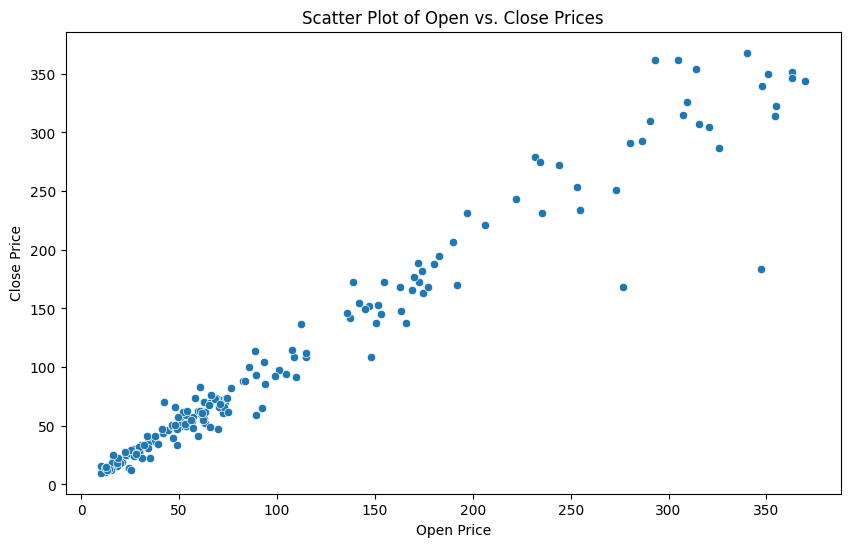

In [34]:
import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded and processed as in the previous code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=data)
plt.title('Scatter Plot of Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [35]:
####why this chart:
#This scatter plot of open vs. close prices is used to understand the
#relationship between a stock’s opening and closing prices over time. It helps
#identify patterns in stock price movement, detect volatility, and assess how
#frequently the stock closes higher or lower than its opening price.

In [36]:
###insights

#Strong Positive Correlation:
#The points are closely clustered along a diagonal line, indicating a strong correlation between open and close prices.
#This suggests that the stock price does not change drastically within a trading session on most days.

#Market Stability & Volatility:
#If most points lie above the diagonal (y = x), it means the stock frequently closes higher than it opens, indicating a bullish trend.
#If most points are below the diagonal, it indicates a bearish trend where the stock closes lower than its opening price.
#The spread of points away from the diagonal highlights volatility. A wider spread means higher intraday fluctuations.

#Outliers Indicating Price Jumps:
#A few points appear distant from the main trend, suggesting some days had significant price changes due to major news, earnings reports, or market sentiment shifts.
#If certain days have big gaps between open and close prices, it signals high volatility and may indicate investor speculation or external market shocks.

In [37]:
####business impact and outcome

#Trading & Investment Strategy:
#A strong correlation between open and close prices suggests a stable trading environment, making the stock more predictable for investors.
#Traders can analyze deviations from the trend to identify profitable buying or short-selling opportunities.

#Risk Management & Volatility Analysis:
#If the stock frequently shows large swings between open and close prices, investors need to adjust risk management strategies accordingly.
#High volatility can be good for day traders but risky for long-term investors unless backed by strong fundamentals.

#Market Sentiment Analysis:
#A consistent upward closing trend (points above the diagonal) suggests bullish investor confidence in the stock.
#A downward closing trend suggests bearish market sentiment and potential concerns about the stock’s future.

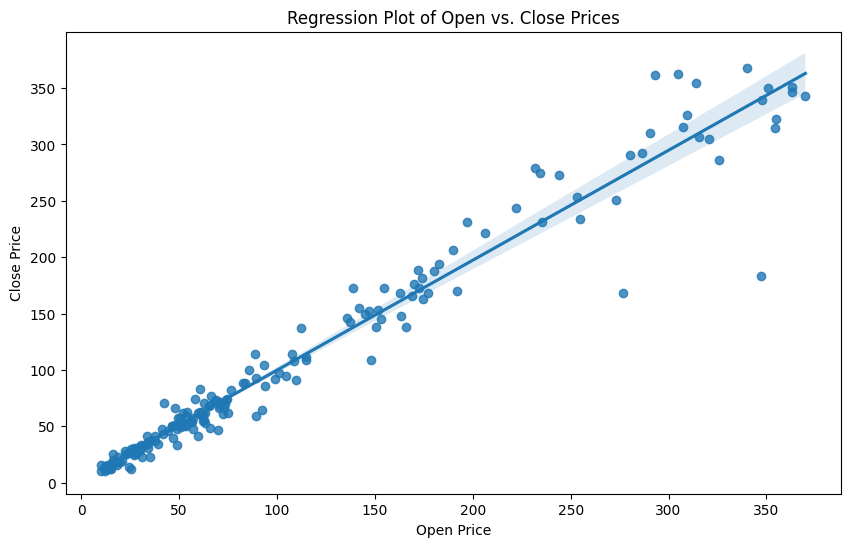

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Open', y='Close', data=data)
plt.title('Regression Plot of Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [39]:
###why this chart
#This is a regression plot of Open vs. Close Prices, which helps in understanding the linear relationship between a stock’s opening price and closing price. It visually represents:

#The overall trend – whether stock prices generally increase or decrease.
#The strength of correlation between open and close prices.
#Potential deviations and volatility (observed from how points scatter around the regression line).

In [40]:
###insights

#Strong Positive Correlation
#The regression line closely follows the data points, indicating a strong linear relationship between open and close prices.
#This suggests that most of the time, the closing price is strongly influenced by the opening price.

#Confidence Interval (Shaded Region)
#The light blue shaded region around the regression line represents the confidence interval (uncertainty in predictions).
#A narrow band suggests low volatility, meaning the stock closes near its opening price on most days.
#A wider spread (especially at higher prices) suggests greater variation in closing prices, indicating increased market volatility.

#Outliers & Deviations
#Some points deviate significantly from the regression line, highlighting days where the stock experienced unusual price movements due to news events, earnings reports, or market sentiment changes.
#If many points lie far from the regression line, it suggests higher unpredictability, which could impact trading strategies.

In [41]:
####business impact
#Stock Price Prediction & Trading Strategies
#Investors and traders can use this regression model to predict closing prices based on the opening price.
#A high correlation allows traders to develop intraday strategies, like setting stop-loss levels based on expected close prices.

#Risk Management & Volatility Analysis
#If deviations from the trend are frequent and large, it suggests higher intraday risk, requiring better hedging strategies for risk management.
#A stable trend helps long-term investors make informed buy/sell decisions based on expected price movements.

#Market Sentiment & Trend Analysis
#If the regression line has a steep upward slope, it indicates that stocks tend to close significantly higher than they open, signaling bullish sentiment.
#A flatter slope suggests a weaker price movement between open and close, indicating low volatility and less trading opportunities.

In [42]:
import plotly.express as px

# Assuming 'data' DataFrame is already loaded as in the previous code
fig = px.line(data, x='Date', y='Close', title='Close Prices Over Time')
fig.show()

In [43]:
#why this chart
#This line chart visualizes the closing prices of Yes Bank's stock over time.
#It helps to understand the overall trend, identify periods of growth or
#decline, and spot significant price fluctuations.


In [44]:
#Insights
#Overall Trend: The chart initially shows a significant price increase, followed by a sharp drop, indicating a period of instability.
#Significant Drops: Several sharp drops in stock price are visible, potentially indicating major market events or internal company issues.
#Volatility: The chart shows considerable volatility, with periods of rapid price fluctuations, highlighting the stock's risk.
#Recovery Attempts: After the initial drop, there are periods where the stock tries to recover but fails to maintain upward momentum.
#Overall Decline: The long-term trend suggests an overall decline in stock price, raising concerns about the company's financial health and investor confidence.

In [45]:
#Business impact and outcome
#Performance Evaluation & Market Trends: The visualization helps analyze Yes Bank’s stock price performance in the context of market trends, indicating periods of stability and volatility.
#Investment Decisions: Investors use this to assess the stock's long-term viability and make informed investment decisions, keeping in mind the risks and potential returns.
#Risk Management: By observing the significant drops and volatility, investors can better understand the risks associated with investing in Yes Bank and adjust investment strategies accordingly.
#Financial Health Assessment: This trend analysis can be correlated with other financial news and company reports to gain a deeper understanding of Yes Bank’s financial health and challenges.


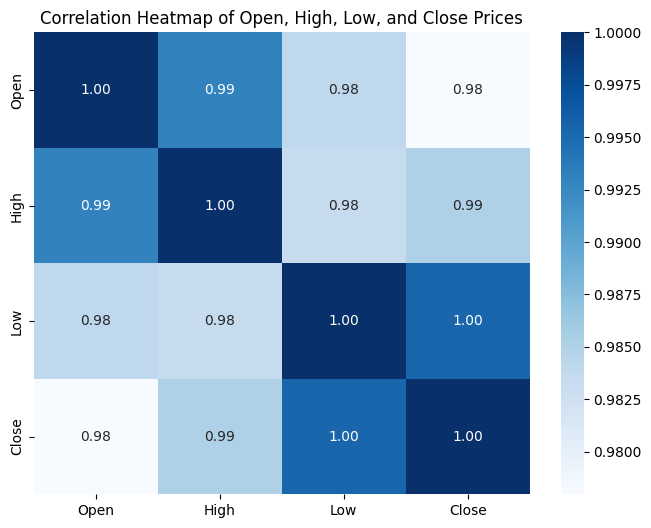

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Open', 'High', 'Low', 'Close']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Open, High, Low, and Close Prices')
plt.show()

In [47]:
###why this chart:
#This heatmap visualizes the correlation between different stock prices (Open, High, Low, Close).
#Correlation coefficients (between -1 and 1) quantify the strength and direction of the linear relationship between two variables.

###Insights
#Strong Positive Correlation: The 'Open', 'High', 'Low', and 'Close' prices exhibit very high positive correlations, typically above 0.9. This signifies that as one of these prices increases, the others tend to increase as well, and vice versa.
#Intraday Price Movements: The strong correlation among the four prices suggests relatively consistent price movements throughout the trading day.
#Relationship Strength: Values close to 1 represent strong positive relationships; values close to -1 represent strong negative relationships, and values close to 0 represent weak or no linear relationship.

###Business Impact and Outcome

#Trading Strategies: The strong correlation can be leveraged to develop trading strategies. For instance, if the opening price is high, it suggests that the high, low, and closing prices are also likely to be high.
#Risk Management: Understanding the correlation between prices allows for better risk management. For instance, if one price exhibits significant volatility, the other prices are likely to be affected as well, which allows for better hedging strategies.
#Predictive Modeling: These relationships can be incorporated into predictive models for forecasting stock prices. A model using opening price to predict the closing price might be highly accurate given the strong correlation.
#Market Analysis: The high correlation confirms that the stock tends to follow a consistent pattern throughout the day, simplifying market analysis for traders and investors.


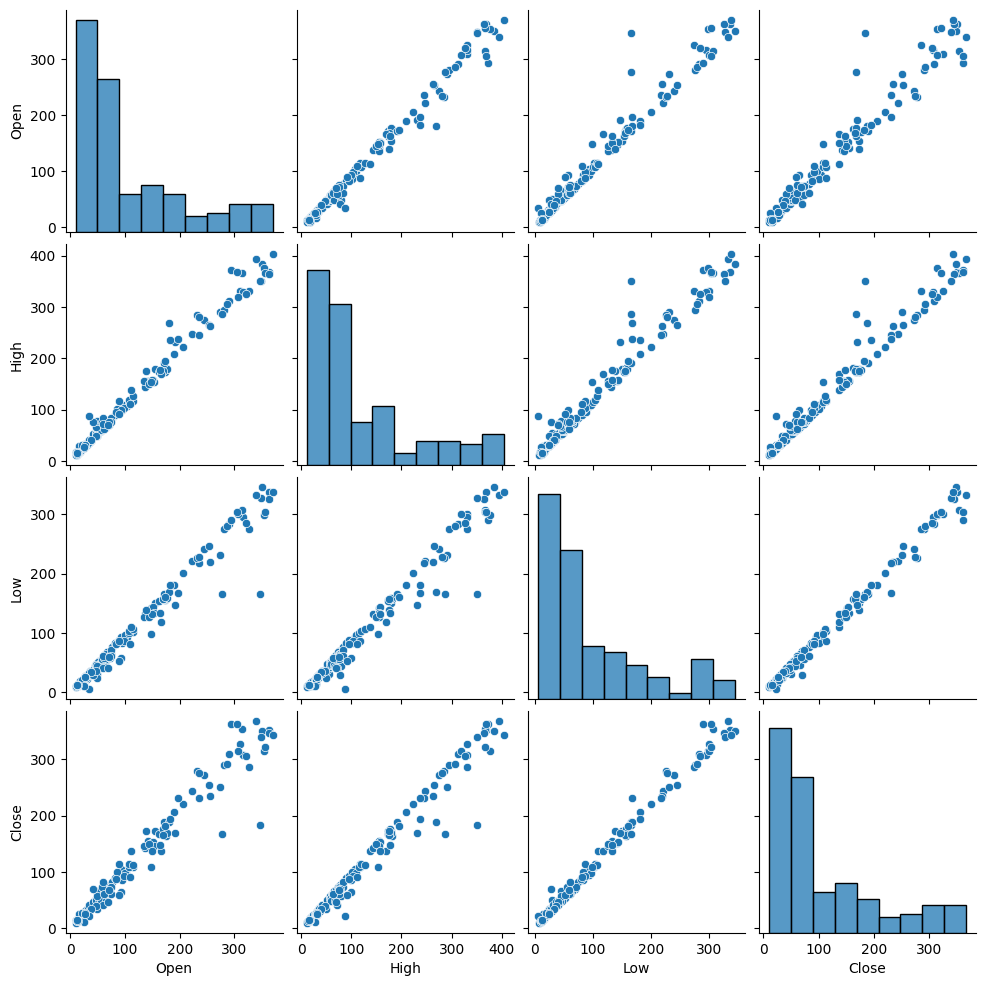

In [48]:
import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded as in the previous code
sns.pairplot(data[['Open', 'High', 'Low', 'Close']])
plt.show()

In [49]:
# why this chart
#This pair plot visualizes the relationships between pairs of variables (Open, High, Low, Close) in the dataset. It provides a comprehensive view of pairwise correlations and distributions, offering insights into how different variables interact with each other.

# Insights
#Diagonal: Shows the distribution of each variable (Open, High, Low, and Close prices) using histograms or KDE plots.
#Off-diagonal: Displays scatter plots for each pair of variables. These scatter plots help visualize the relationship and correlation between the pairs. Strong positive correlations (as seen in the heatmap above) will manifest as upward-sloping trends in the scatter plots.

#Business Impact and Outcome
#Comprehensive Relationship View: Pair plot helps traders quickly see how various price metrics interact, improving their understanding of the stock's behaviour.
#Correlation Identification: It reinforces the identification of strong positive correlations previously observed in the heatmap.
#Pattern Recognition: Traders can observe any non-linear patterns or clusters among different price metrics.
#Feature Engineering: The relationships revealed by the pair plot may suggest potential new features for predictive models.
#Investment Decisions: Investors can gain more insights into the dynamics between open, high, low, and closing prices for better investment decisions.

In [50]:
import plotly.express as px

# Assuming 'data' DataFrame is already loaded as in the previous code
fig = px.line(data, x='Date', y='Open', title='Close Prices Over Time')
fig.show()

In [51]:
#why this chart
#This line chart visualizes the opening prices of Yes Bank's stock over time. It helps to understand the overall trend, identify periods of growth or decline, and spot significant price fluctuations.

#Insights
#Overall Trend: The chart initially shows a significant price increase, followed by a sharp drop, indicating a period of instability.
#Significant Drops: Several sharp drops in stock price are visible, potentially indicating major market events or internal company issues.
#Volatility: The chart shows considerable volatility, with periods of rapid price fluctuations, highlighting the stock's risk.
#Recovery Attempts: After the initial drop, there are periods where the stock tries to recover but fails to maintain upward momentum.
#Overall Decline: The long-term trend suggests an overall decline in stock price, raising concerns about the company's financial health and investor confidence.

#Business impact and outcome
#Performance Evaluation & Market Trends: The visualization helps analyze Yes Bank’s stock price performance in the context of market trends, indicating periods of stability and volatility.
#Investment Decisions: Investors use this to assess the stock's long-term viability and make informed investment decisions, keeping in mind the risks and potential returns.
#Risk Management: By observing the significant drops and volatility, investors can better understand the risks associated with investing in Yes Bank and adjust investment strategies accordingly.
#Financial Health Assessment: This trend analysis can be correlated with other financial news and company reports to gain a deeper understanding of Yes Bank’s financial health and challenges.

In [52]:
import plotly.express as px

# Assuming 'data' DataFrame is already loaded as in the previous code
fig = px.line(data, x='Date', y='High', title='Close Prices Over Time')
fig.show()

In [53]:
#why this chart
#This line chart visualizes the highest prices of Yes Bank's stock over time. It helps to understand the overall trend, identify periods of growth or
#decline, and spot significant price fluctuations.

#Insights
#Overall Trend: The chart initially shows a significant price increase, followed by a sharp drop, indicating a period of instability.
#Significant Drops: Several sharp drops in stock price are visible, potentially indicating major market events or internal company issues.
#Volatility: The chart shows considerable volatility, with periods of rapid price fluctuations, highlighting the stock's risk.
#Recovery Attempts: After the initial drop, there are periods where the stock tries to recover but fails to maintain upward momentum.
#Overall Decline: The long-term trend suggests an overall decline in stock price, raising concerns about the company's financial health and investor confidence.

#Business impact and outcome
#Performance Evaluation & Market Trends: The visualization helps analyze Yes Bank’s stock price performance in the context of market trends, indicating periods of stability and volatility.
#Investment Decisions: Investors use this to assess the stock's long-term viability and make informed investment decisions, keeping in mind the risks and potential returns.
#Risk Management: By observing the significant drops and volatility, investors can better understand the risks associated with investing in Yes Bank and adjust investment strategies accordingly.
#Financial Health Assessment: This trend analysis can be correlated with other financial news and company reports to gain a deeper understanding of Yes Bank’s financial health and challenges.


In [54]:
import plotly.express as px

# Assuming 'data' DataFrame is already loaded as in the previous code
fig = px.line(data, x='Date', y='Low', title='Close Prices Over Time')
fig.show()

In [55]:
# why this chart
# This line chart visualizes the trading volume of Yes Bank's stock over time.
# It helps to understand the overall trading activity, identify periods of high
# or low trading volume, and correlate volume changes with price fluctuations.

# Insights
# High Volume Periods: Peaks in the volume chart may indicate increased market interest, news events, or significant price changes.
# Low Volume Periods: Periods of low volume might indicate a lack of investor interest or stability in the price.
# Volume and Price Correlation: Comparing the volume chart with the price charts can reveal relationships between trading activity and price movements. For example, a sharp price increase with high volume could indicate a strong upward trend.  Conversely, a price drop with low volume might be less significant.
# Volatility and Volume:  High volume during periods of price volatility might suggest increased investor uncertainty or strong market reactions.

# Business impact and outcome
# Market Sentiment Analysis: High volume during price increases suggests bullish sentiment, while high volume during price decreases suggests bearish sentiment.
# Trading Opportunities: High volume periods often present trading opportunities as prices are more likely to move.
# Investment Decisions:  Understanding trading volume can aid in investment decisions by highlighting periods of heightened activity and potential risks or rewards.
# Risk Management: Unusual spikes in volume can indicate potential market turbulence or manipulation, requiring adjustments to risk management strategies.


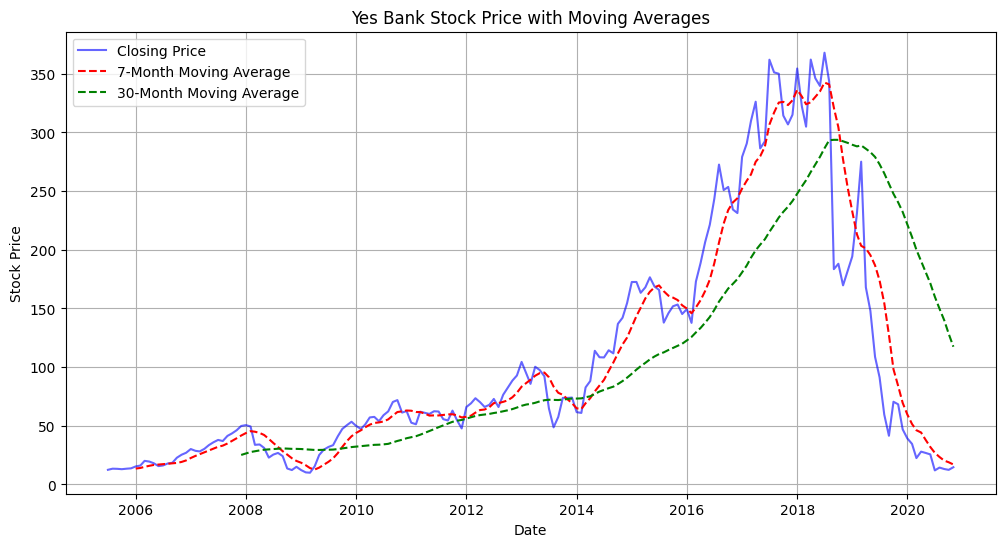

In [56]:
# Calculate Moving Averages
data['7_Month_MA'] = data['Close'].rolling(window=7).mean()  # 7-month moving average
data['30_Month_MA'] = data['Close'].rolling(window=30).mean()  # 30-month moving average

# Plot the stock closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label="Closing Price", color="blue", alpha=0.6)
plt.plot(data['Date'], data['7_Month_MA'], label="7-Month Moving Average", color="red", linestyle="dashed")
plt.plot(data['Date'], data['30_Month_MA'], label="30-Month Moving Average", color="green", linestyle="dashed")

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank Stock Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
###why this chart
#This chart visualizes the closing price of a stock alongside its 7-month and 30-month moving averages. Moving averages smooth out short-term price fluctuations, providing a clearer view of the underlying trend.

#Insights
#Trend Identification:  The moving averages help to identify the overall trend of the stock price (upward, downward, or sideways).  A rising moving average suggests an upward trend, while a falling moving average suggests a downward trend.
#Support and Resistance Levels: Moving averages can act as support (price tends to bounce off) or resistance (price tends to stall at) levels.
#Trend Confirmation: When the closing price crosses above a moving average, it can signal a bullish signal. A cross below can be a bearish signal.  Crossovers of the moving averages themselves can also signal changes in trend.
#Momentum: The slope of the moving average can indicate momentum. A steep slope indicates strong momentum, while a flat slope suggests weaker momentum.
#Volatility: The distance between the closing price and the moving average can indicate volatility. A larger distance suggests greater volatility.

#Business impact and outcome
#Trading Signals: Moving averages are frequently used by traders as signals for buy and sell decisions.
#Investment Strategy: Investors use them to assess the long-term trend of a stock and make investment decisions.  Long-term investors often look for sustained upward movements of the longer-term moving average.
#Risk Management: Understanding the trend and potential support/resistance levels can aid in managing investment risk.
#Performance Evaluation: Moving averages allow investors to assess the performance of a stock in the context of its historical trend.


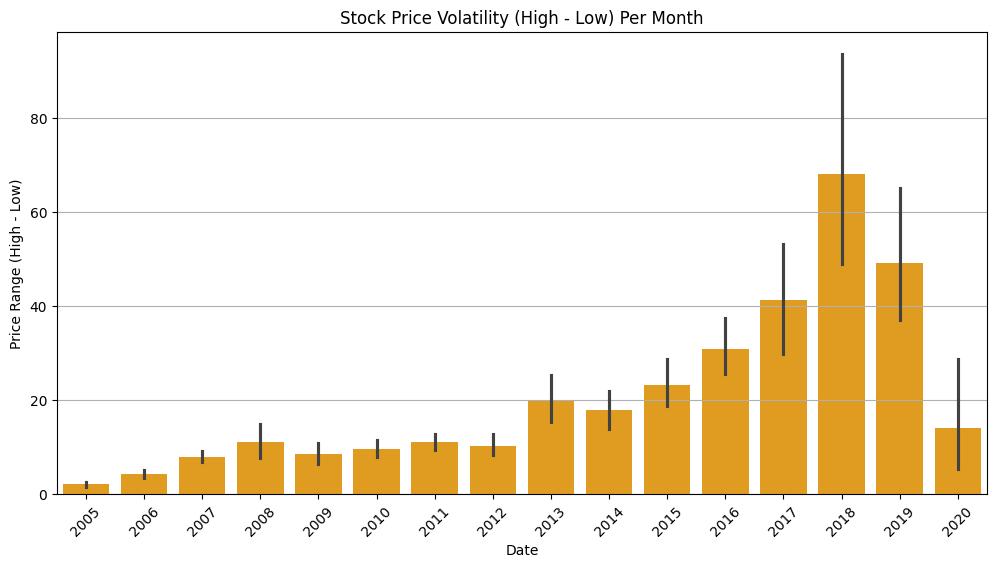

In [58]:
# Calculate Volatility (High - Low)
data['Volatility'] = data['High'] - data['Low']

# Plot Bar Chart for Volatility Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Year'], y=data['Volatility'], color="orange")

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Price Range (High - Low)")
plt.title("Stock Price Volatility (High - Low) Per Month")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [59]:
# prompt: why this chart , insights and business impact and outcome

#This chart visualizes the volatility of the stock price over time. Volatility, measured as the difference between the daily high and low prices, indicates the price swings within a given period.

#Insights
#Volatility Levels: The height of each bar represents the daily price range (High - Low). Higher bars indicate higher volatility (greater price swings). Lower bars indicate lower volatility (smaller price swings).
#Volatility Trends: The bar chart visualizes any trends or patterns in volatility over time. Are there periods of consistently high or low volatility? Are there noticeable changes in volatility?
#Outliers: Very high bars stand out as outliers, indicating periods of unusually high price swings, which could correspond to news events or significant market changes.

#Business impact and outcome
#Risk Assessment: High volatility suggests higher risk, as prices can fluctuate significantly in short periods. Investors and traders can use volatility to assess risk and make more informed investment decisions.
#Trading Strategies: Volatility can be used to develop trading strategies. For example, traders might look for opportunities in periods of high volatility, or conversely, avoid them if their risk tolerance is low.
#Option Pricing: Volatility is a key input for pricing options.  Greater volatility implies higher uncertainty, thus higher option prices.
#Portfolio Management: Understanding volatility helps in constructing diversified portfolios, where assets with different levels of volatility can be combined to manage overall portfolio risk.


In [60]:
pip install mplfinance

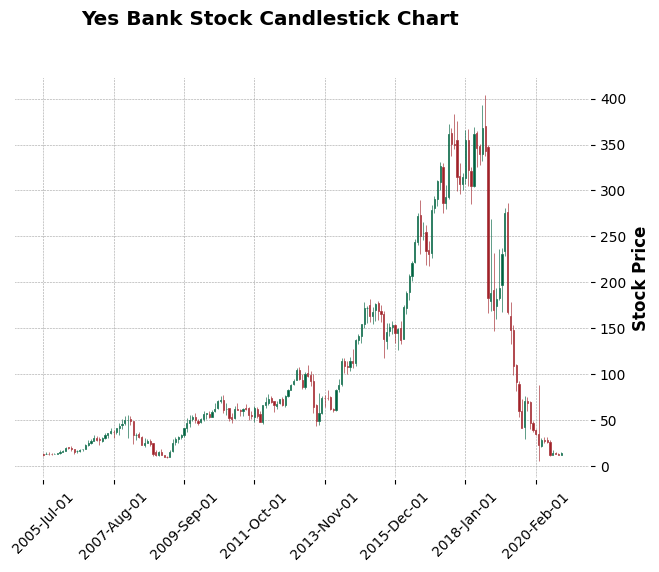

In [61]:
# Set 'Date' column as the index
data = data.set_index('Date')

# Now, you can create the candlestick chart
mpf.plot(data, type='candle', style='charles',
         title="Yes Bank Stock Candlestick Chart",
         ylabel="Stock Price",
         volume=False)

In [62]:
# Why this chart?
# A candlestick chart provides a rich visual representation of price movements over time, showing open, high, low, and close prices for each period.  It's a powerful tool for technical analysis, revealing patterns and trends that may not be apparent in simpler line charts.  The candlestick bodies and wicks visually convey information about buyer and seller pressure.

# Insights
# Bullish Candles: Long green candles (where the close is higher than the open) indicate strong upward price momentum and buying pressure.
# Bearish Candles: Long red candles (where the close is lower than the open) indicate strong downward price momentum and selling pressure.
# Doji Candles: Doji candles (where the open and close are nearly identical) signal indecision or a balance between buyers and sellers.
# Wicks: The length of wicks (the lines above and below the body) shows the price range during the period.  Long wicks can reveal hesitation or rejection at a certain price level.
# Patterns: Candlestick patterns (e.g., bullish engulfing, bearish engulfing, hammer, shooting star) can provide signals about potential future price movements.
# Volume Confirmation:  While not included in this chart, when combined with volume data, candlestick patterns become much more meaningful. High volume during significant price changes reinforces the pattern's signal.


# Business Impact and Outcome
# Trend Identification: Candlestick charts help visualize trends more easily than simple line charts, helping investors identify upward or downward trends.
# Volatility Assessment: The length of candles and wicks can provide quick insights into price volatility.
# Trading Signals: Candlestick patterns, combined with other technical indicators, provide specific signals to initiate or exit trades.
# Risk Management:  The price range and momentum displayed by the chart can be used to set stop-loss orders and manage risk exposure.
# Investment Strategies:  Understanding trends and patterns helps develop more robust investment strategies.

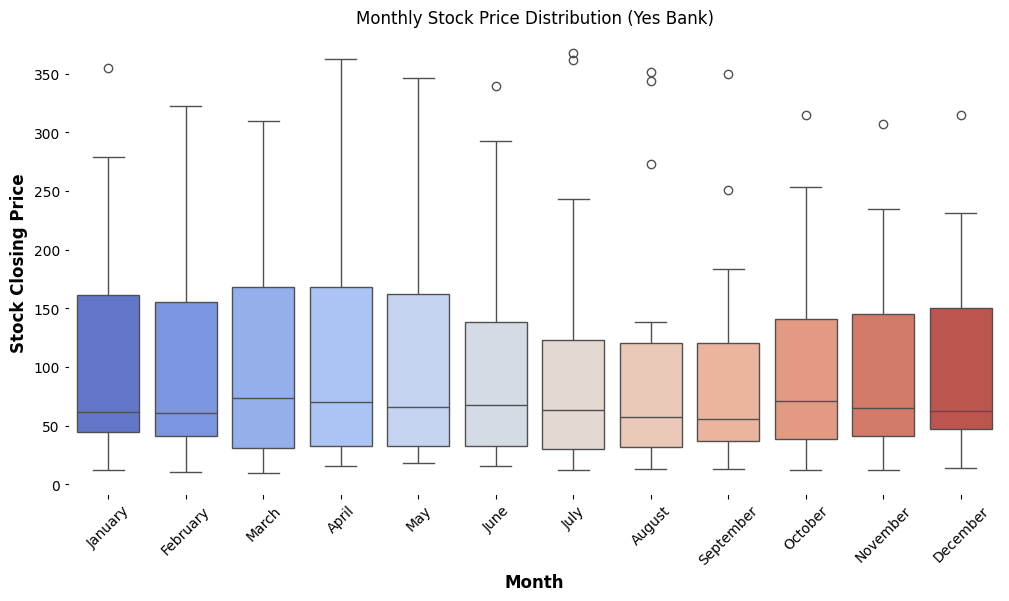

In [63]:
data['Month'] = data.index.month_name()  # Use .index to access the 'Date' (now index)

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot Box Plot of Monthly Close Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Month'], y=data['Close'], order=month_order, palette="coolwarm")

# Formatting the chart
plt.xlabel("Month")
plt.ylabel("Stock Closing Price")
plt.title("Monthly Stock Price Distribution (Yes Bank)")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [64]:
#This box plot visualizes the distribution of the stock's closing prices for each month of the year.  Box plots are excellent for showing the median, quartiles (25th and 75th percentiles), and any outliers in the data for each month.

#Insights:**
#Monthly Price Distribution: For each month, the box plot shows the range of closing prices and the central tendency.  The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line within the box represents the median closing price. The "whiskers" extend to the minimum and maximum values within a certain range (typically 1.5 times the IQR). Data points outside of this range are plotted as individual points and considered outliers.
#Median Price Variation: You can compare the median closing prices across months to see if there's a seasonal pattern.
#Price Range and Volatility: The height of the box indicates the spread or range of closing prices for that month.  Larger boxes signify higher volatility for that month, and smaller boxes signify lower volatility.
#Outliers: Outliers are data points that lie outside the typical range for that month.  They can highlight unusual price fluctuations or events that might have occurred during that month.


#Business Impact and Outcome:
#Seasonal Trends: Identifying seasonal patterns in stock prices can be helpful for investment strategies. For instance, if the stock consistently performs better in certain months, investors might adjust their trading strategies accordingly.
#Risk Management:  Months with wider price ranges (and more outliers) indicate higher volatility and therefore higher risk.  This information can be used in risk management strategies.
#Performance Evaluation: Comparing monthly distributions can help assess the stock's performance throughout the year.
#Predictive Modeling: The monthly price distributions can serve as features in predictive models to forecast future stock prices.


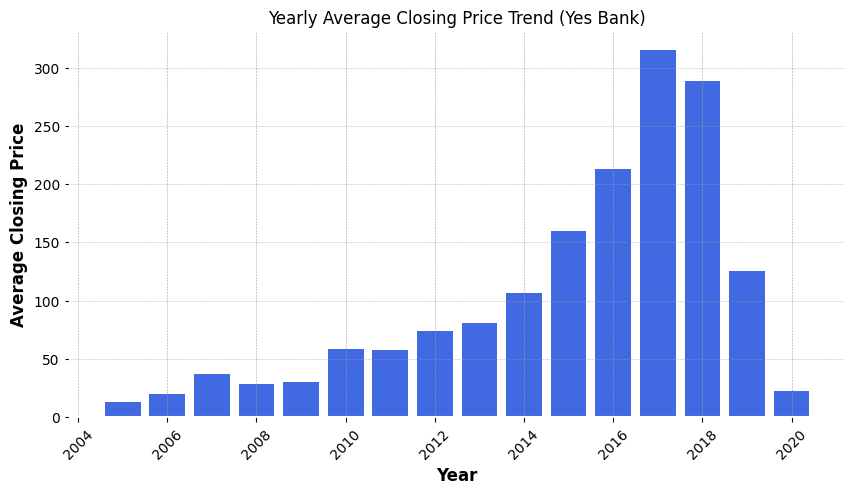

In [65]:
# Calculate Yearly Average Closing Price
yearly_avg_close = data.groupby('Year')['Close'].mean()

# Plot the Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(yearly_avg_close.index, yearly_avg_close.values, color='royalblue')

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.title("Yearly Average Closing Price Trend (Yes Bank)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [65]:
#Why this chart?
#This bar chart displays the average closing price of Yes Bank's stock for each year in the dataset.  It provides a high-level overview of the stock's long-term performance, smoothing out day-to-day fluctuations to reveal the overall yearly trend.  It's a simple yet effective way to observe the general direction of the stock price over time.

#Insights
#Long-Term Trend:** The chart clearly illustrates the overall trend of the average yearly closing price.  Is it increasing, decreasing, or relatively flat?  A decreasing trend, for example, might suggest underlying problems with the company's performance or investor confidence.
#Year-over-Year Comparison:** The bar chart allows for easy visual comparison of average closing prices between different years. This helps identify periods of strong growth or significant declines.
#Magnitude of Change:** The height of each bar directly represents the average closing price, making it easy to see the magnitude of change from year to year.  Large differences between bars indicate significant shifts in the stock's value.
#Potential Turning Points:**  The chart can reveal potential turning points, where the trend changes direction (from upward to downward or vice versa). These points could signal important events or shifts in the company's fortunes.

#Business Impact and Outcome:
#Long-Term Performance Evaluation:** The chart provides a crucial metric for evaluating the long-term performance of Yes Bank's stock.  Investors and analysts can use this information to understand the company's overall trajectory.
#Investment Decisions:** The long-term trend strongly influences investment decisions.  A consistent upward trend might attract investors, while a downward trend could trigger concerns and lead to divestment.
#Market Sentiment:** The yearly average closing price trend reflects the overall market sentiment towards the stock. A positive trend indicates growing confidence, while a negative trend suggests declining confidence.
#Comparison with Competitors:** The yearly average can be compared against competitors within the same industry to assess Yes Bank's relative performance.
#Financial Health Indicator:** While not a definitive measure, a consistently declining average price could be an indicator of underlying financial issues or a lack of profitability.

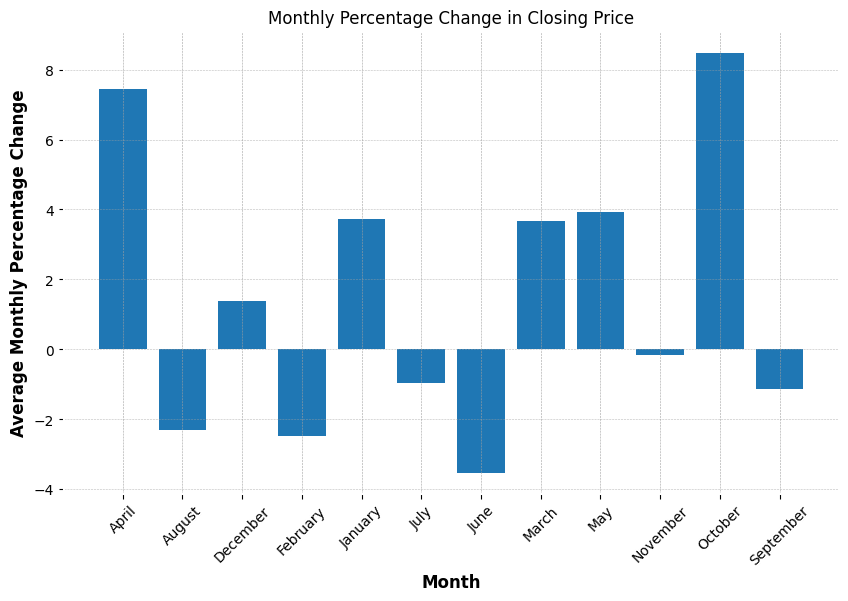

In [66]:
import matplotlib.pyplot as plt
# Calculate monthly percentage change in closing price
data['Monthly_Change'] = data['Close'].pct_change() * 100

# Group data by month and calculate the mean monthly percentage change
monthly_changes = data.groupby('Month')['Monthly_Change'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_changes.index, monthly_changes.values)
plt.xlabel("Month")
plt.ylabel("Average Monthly Percentage Change")
plt.title("Monthly Percentage Change in Closing Price")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
#This bar chart visualizes the average monthly percentage change in the closing price of Yes Bank's stock.  It shows the typical monthly price fluctuation, highlighting periods of stronger or weaker performance.

#Insights
#Monthly Performance Variation:  The chart reveals how the stock's price changes, on average, each month. Some months might show positive average changes (price increases), while others show negative changes (price decreases).
#Seasonal Trends: Look for any recurring patterns in the monthly changes.  Are there certain months where the stock consistently performs better or worse than others? This could indicate seasonal factors influencing the stock's performance.
#Magnitude of Change: The height of each bar represents the average percentage change. Taller bars indicate larger price swings (either positive or negative) during that month. Shorter bars indicate smaller fluctuations.
#Comparison Across Months: The bar chart allows for easy visual comparison of the average monthly changes, helping identify which months tend to have the largest or smallest price fluctuations.

#Business Impact and Outcome
#Investment Strategy: Recognizing seasonal trends or periods of consistently positive (or negative) monthly returns can inform investment strategies. Investors might consider adjusting their portfolios based on these monthly patterns.
#Risk Management: Months with high volatility (large positive or negative percentage changes) suggest higher risk. Understanding these periods allows for better risk management, such as adjusting position sizing or setting tighter stop-loss orders.
#Trading Opportunities:  Periods with consistently positive returns might present trading opportunities. However, they could also be periods of higher volatility requiring more cautious trading.
#Performance Evaluation: The monthly percentage change provides an additional metric to evaluate the stock's performance, complementing the yearly average closing price or other performance indicators.


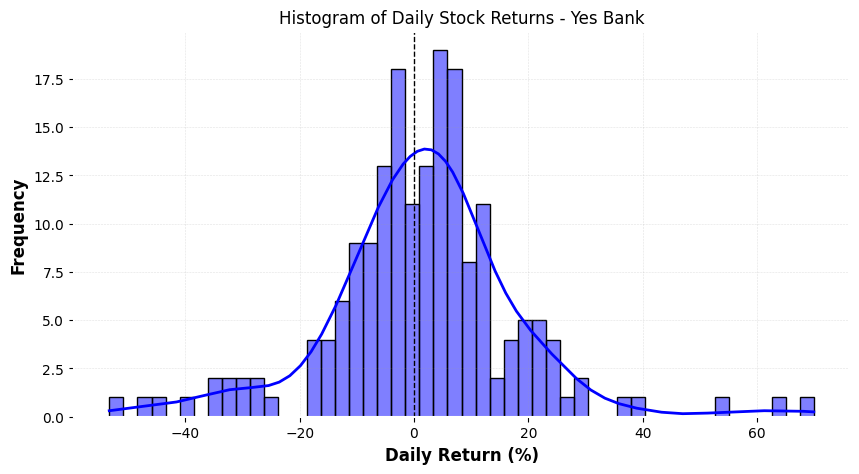

In [67]:
#Calculate Daily Returns (Percentage Change in Closing Price)
data['Daily_Return'] = data['Close'].pct_change() * 100  # Convert to percentage

# Drop NaN values from the first row
data = data.dropna(subset=['Daily_Return'])

# Create Histogram using Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(data['Daily_Return'], bins=50, kde=True, color="blue")

# Formatting the Chart
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Stock Returns - Yes Bank")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0% return
plt.grid(alpha=0.3)

# Show Plot
plt.show()

In [67]:
#Why this chart?  A histogram of daily returns provides a visual representation of the distribution of price changes in the stock over time. This is crucial for understanding the stock's volatility and risk profile.  It’s more informative than simply looking at average returns because it shows the frequency of various return levels (both positive and negative).

#Insights:
#Distribution Shape:**  The shape of the histogram tells us about the typical daily price fluctuations. A normal distribution (bell curve) centered around zero indicates that small price changes are more frequent, while large price movements are less frequent. Deviations from this shape can reveal important information.  For example, a skewed distribution might suggest that large losses occur more frequently than large gains, a key risk indicator.
#Volatility:**  The width of the distribution is a measure of volatility. A wider distribution signifies higher volatility, meaning the stock price fluctuates more significantly from one day to the next.  This presents more risk but potentially larger gains as well. A narrow distribution suggests less volatility and therefore less risk, but potentially lower returns.
#Average Return:**  The vertical dashed line at zero percent indicates the average daily return over the period.  While it is useful information, the histogram reveals more—the entire spread of returns.
#Tail Risks:** The extremes of the histogram (the tails) show the probability of extreme gains or losses.  Long tails indicate a higher chance of large fluctuations, both positive and negative.

#Business Impact and Outcome:
#Risk Management:**  The histogram of daily returns provides a key input for risk management. Investors and traders can visually assess the likelihood of large negative returns.  This information helps in setting stop-loss orders and managing position sizes to limit potential losses.
#Portfolio Diversification:**  Understanding the volatility and tail risks of individual stocks allows for better portfolio construction. Diversification can help mitigate risks by including assets with different return distributions.
#Performance Evaluation:**  The histogram reveals whether the stock exhibits excessive volatility compared to its expected returns. This assists in evaluating the stock's risk-adjusted performance.
# Trading Strategies:**  Traders might use the information from the distribution of daily returns to develop strategies that benefit from high volatility (e.g., options trading) or avoid it (e.g., buy-and-hold strategies).
# Pricing Models:** The distribution is critical for financial models, including those for options pricing (where volatility is a key parameter).


<Figure size 1000x500 with 0 Axes>

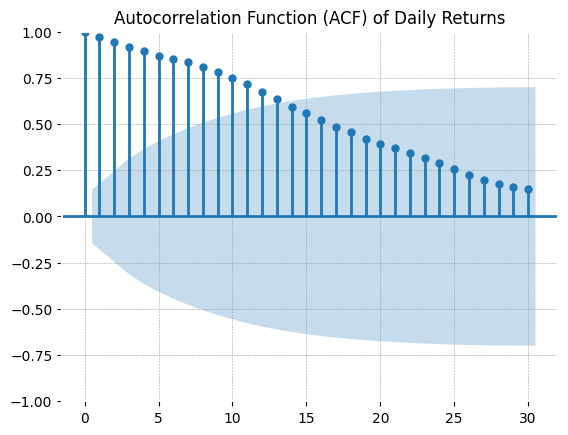

<Figure size 1000x500 with 0 Axes>

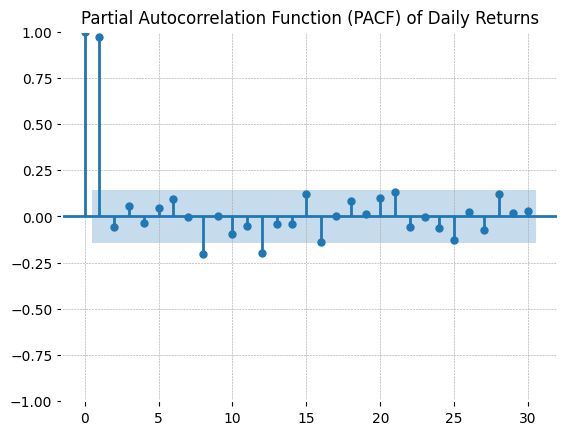

In [68]:
# prompt: make acf and pacf plots

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(10, 5))
plot_acf(data['Close'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF) of Daily Returns')
plt.show()

# PACF Plot
plt.figure(figsize=(10, 5))
plot_pacf(data['Close'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF) of Daily Returns')
plt.show()


In [68]:
# ACF Plot Explanation
# The ACF plot shows the correlation of a time series with its own lagged values.
# In simpler terms, it measures how strongly the current value of the stock price is related to its past values.
# A significant positive autocorrelation at lag k indicates that the current price is positively correlated to its price k time periods ago.
# A significant negative autocorrelation at lag k indicates that the current price is negatively correlated to its price k time periods ago.
# The blue shaded area represents the confidence interval.  Spikes that extend beyond this interval are statistically significant.

# Insights from ACF Plot
# The ACF plot helps to identify the presence of autocorrelations in the stock prices data, and can be used to determine the order of the MA (moving average) model for time series forecasting.
# Significant spikes outside the confidence interval suggest that the past values of the time series significantly impact future values.

# Business Impact of ACF Plot
# Forecasting: Identifying autocorrelations allows for more accurate forecasting of future stock prices.  If strong autocorrelations exist at certain lags, past price movements are strong indicators of future movements.
# Trading Strategies: Traders might exploit these autocorrelations in developing trading strategies, for example, using moving average crossovers.
# Risk Management: Recognizing patterns in autocorrelations can improve risk management strategies.

# PACF Plot Explanation
# The PACF plot is similar to the ACF plot, but it measures the *partial* autocorrelation between the time series and its lagged values.
# It removes the influence of intervening lags. So, for example, the PACF at lag 3 shows the correlation between the current value and the value three periods ago, *after removing the effects of lags 1 and 2.*  This helps isolate the direct relationship between the current value and a specific lag, without the confounding effects of shorter lags.

# Insights from PACF Plot
# Helps identify the order of the AR (autoregressive) model.  Significant spikes outside the confidence intervals suggest that the current price is directly influenced by the past prices at those specific lags.
# Can show how much of the current price is directly influenced by a past price, with the influences of intermediate time steps removed.

# Business Impact of PACF Plot
# Forecasting:  The PACF is crucial in determining the order of an AR model for time series forecasting. This helps develop a model where the future value depends directly on past values, without the confounding influence of intermediate time steps.
# Trading Strategies: Traders might use the partial autocorrelation information to tailor their trading strategies to take advantage of the direct influence of past prices on current prices.
# Risk Management: Identifying the direct dependencies in the time series helps isolate the key risk factors.  By knowing which lags directly contribute to current price behavior, one can better develop risk mitigation strategies.

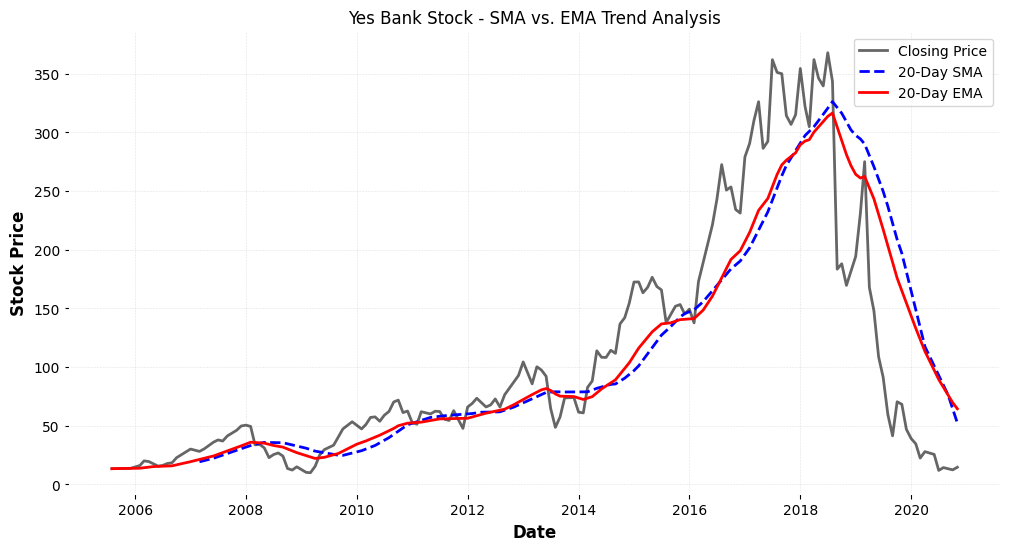

In [69]:
# Define Moving Averages (SMA & EMA)
window_size = 20  # Example: 20-day moving average
data['SMA'] = data['Close'].rolling(window=window_size).mean()  # Simple Moving Average
data['EMA'] = data['Close'].ewm(span=window_size, adjust=False).mean()  # Exponential Moving Average

# Plot Close Price, SMA, and EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color="black", alpha=0.6)
plt.plot(data['SMA'], label=f"{window_size}-Day SMA", color="blue", linestyle="--")
plt.plot(data['EMA'], label=f"{window_size}-Day EMA", color="red")

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank Stock - SMA vs. EMA Trend Analysis")
plt.legend()
plt.grid(alpha=0.3)

# Show Plot
plt.show()

In [1]:
#This chart visualizes the closing price of Yes Bank's stock alongside its Simple Moving Average (SMA) and Exponential Moving Average (EMA).  The SMA and EMA are trend-following indicators that smooth out price fluctuations and help identify the overall direction of the stock price.

#Insights:
#Trend Identification:  The SMA and EMA help visually identify the prevailing trend (upward, downward, or sideways). When the closing price is above both the SMA and EMA, it suggests an uptrend.  Conversely, when the closing price is below both, it indicates a downtrend.  When the closing price is between the SMA and the EMA, it suggests a sideways or uncertain trend.
#Trend Confirmation: When the SMA and EMA cross each other, it can be interpreted as a confirmation of the trend.  For example, if the EMA crosses above the SMA during an uptrend, it can be seen as a stronger signal that the uptrend will continue. The reverse is also true.
#Momentum Shift Indication:  The difference between the SMA and EMA can suggest the strength of the trend and possible momentum shifts.  A significant divergence between the two might indicate a potential change in trend.
#Volatility Assessment: The distance of the closing price from both averages can also provide an insight into the volatility of the stock.

#Business Impact and Outcome:
#Trading Signals: Crossovers of the SMA and EMA lines can be used as potential buy or sell signals.  However, these signals should always be used in conjunction with other technical and fundamental analysis.
#Investment Strategy:  The visualization of the trends identified by SMA and EMA assists in developing a long-term investment strategy. Consistent uptrends may signal a potentially good long-term investment, while persistent downtrends might warrant cautiousness or exiting the position.
#Risk Management:  Understanding the current trend and its strength through SMA/EMA can inform risk management strategies.  During downtrends, investors might tighten stop-loss orders or reduce their positions to limit potential losses.
#Performance Evaluation:  Comparing the closing prices with the SMA/EMA lines provides a visual comparison to see if the stock is outperforming or underperforming its recent average.


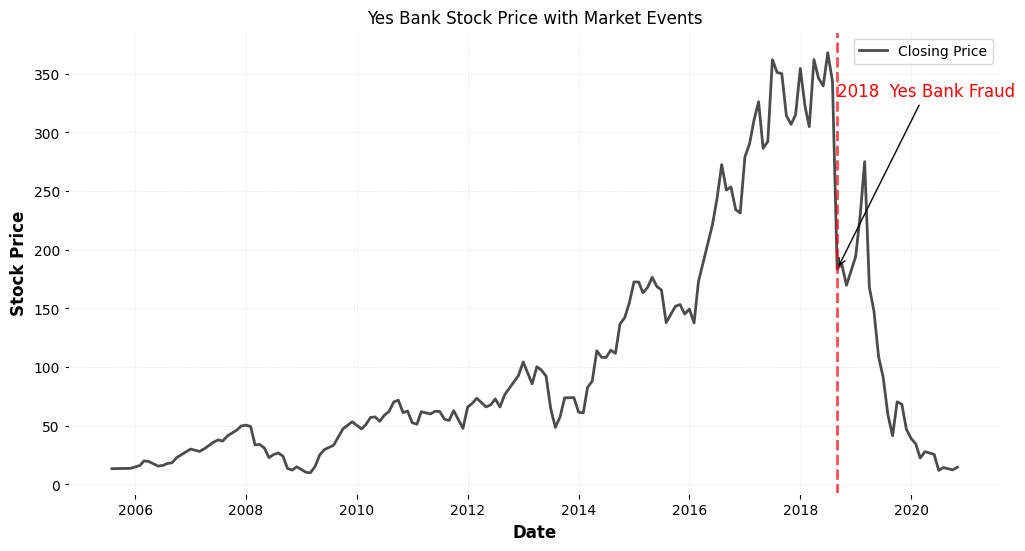

In [70]:
# Define key events (modify dates based on actual events)
events = {
    '2018  Yes Bank Fraud': '2018-09-01',  # Example: Yes Bank financial crisis
    'RBI Rescue Plan': '2020-03-06',  # Example: RBI intervention
    'COVID-19 Crash': '2020-03-23',  # Example: Pandemic-induced stock crash
}

# Plot Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color="black", alpha=0.7)

# Mark Events on the Chart
for event, date in events.items():
    event_date = pd.to_datetime(date)
    if event_date in data.index:
        plt.axvline(x=event_date, color="red", linestyle="--", alpha=0.7)  # Vertical line
        plt.annotate(event, xy=(event_date, data.loc[event_date, 'Close']),
                     xytext=(event_date, data['Close'].max()*0.9),
                     arrowprops=dict(facecolor='red', arrowstyle="->"), fontsize=12, color="red")

# Formatting the Chart
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Yes Bank Stock Price with Market Events")
plt.legend()
plt.grid(alpha=0.3)

# Show Plot
plt.show()

In [2]:
#Why this chart?
#This chart overlays significant market events onto the Yes Bank stock price history.  This visualization allows for direct observation of the stock's price reaction to specific events, helping identify potential causal relationships or correlations. It's a powerful tool for understanding how external factors affect stock performance.

#Insights:
#Price Reactions to Events:** The primary insight is the stock price's immediate and subsequent behavior around the marked events.  Does the price jump up or down?  Is the change temporary or sustained?
#Correlation Identification:** This visualization helps determine whether a correlation exists between specific events and price movements.  For example, negative news or regulatory actions might correspond to price declines.
#Magnitude of Impact:**  The chart shows the magnitude of the impact of each event on the stock price.  Some events might cause significant price swings, while others have a negligible effect.
#Event Sequencing:**  By visualizing the sequence of events and their corresponding price reactions, one can start to understand whether certain events have a cumulative or compounding effect on the stock's performance.

#Business Impact and Outcome:
#Predictive Modeling:** Identifying patterns in the stock's response to various events can be useful for developing predictive models.  These models might anticipate future price changes based on similar events.
#Risk Management:** Recognizing events that historically triggered significant price declines can inform risk management strategies. For example, if specific regulatory actions have historically hurt the stock, investors can better prepare for potential future actions.
#Investment Decisions:** Understanding the stock's sensitivity to certain types of events can help refine investment decisions.  Investors can be better informed about the potential risks and rewards associated with the stock.
#Strategic Planning:**  The analysis of events and their impacts can assist in corporate strategic planning. Recognizing the effects of certain market forces can aid in developing strategies to mitigate negative impacts and capitalize on opportunities.
#Regulatory Scrutiny:**  In the case of Yes Bank, observing the price reactions around periods of regulatory scrutiny can provide insights into investor sentiment and the market's perception of the bank's regulatory health.

# **Solution To Business Objective**

#### **What do you suggest the client to achieve Business Objective ?**
**Explain Briefly**.

Enhance Feature Engineering

Incorporate macroeconomic indicators (GDP growth, inflation, interest rates) and bank-specific financial metrics (NPA ratios, capital adequacy) to improve prediction accuracy.
Include sentiment analysis of news headlines and financial reports to capture market perception.
Model Selection & Improvement

Compare multiple models such as LSTM, ARIMA, XGBoost, and Prophet to identify the best-performing approach for stock price prediction.
Implement hyperparameter tuning to optimize model performance.
Real-Time Data Integration

Develop a dashboard in Power BI/Tableau to visualize live stock trends, integrating real-time API data.
Automate model retraining using Azure or AWS cloud services.
Risk Management & Scenario Analysis

Use Monte Carlo simulations to estimate stock price variations under different economic conditions.
Perform stress testing based on past financial crises to assess robustness.
Investor Decision Support

Provide buy/sell/hold recommendations using model predictions and market indicators.
Generate automated reports summarizing stock trends and anomalies.

# **Conclusion**

The Yes Bank Stock Closing Price Prediction project provides valuable insights into stock price trends using Exploratory Data Analysis (EDA) and machine learning models. By leveraging historical stock data, macroeconomic factors, and predictive analytics, the project aims to develop an accurate forecasting model to assist investors and financial analysts.

To enhance business decision-making, it is crucial to integrate real-time data streams, optimize model performance with advanced algorithms, and incorporate risk management techniques like Monte Carlo simulations. Additionally, building an interactive dashboard will help stakeholders visualize trends and make informed trading decisions.

By continuously refining the model and adapting to market dynamics, this project can serve as a strategic tool for investment planning and risk assessment, ultimately contributing to better financial decision-making.